# Steps to figure out any Dataset for linear regression
1. Import correct libraries       
    a. import appropriate evaluation metrics
2. load the data, (preprocess if needed) and split 
3. train the model
4. evaluate the model
5. plot the metrics

# Import libraries

In [4]:
# libraries needed
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.model_selection import train_test_split

In [7]:
%pip install kagglehub[pandas-datasets]
# @pip install kagglehub[pandas-datasets]

  Using cached pandas-2.3.3-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.3.3-cp313-cp313-win_amd64.whl (11.0 MB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)

   ---------------------------------------- 0/3 [pytz]
   ---------------------------------------- 0/3 [pytz]
   ---------------------------------------- 0/3 [pytz]
   ------------- -------------------------- 1/3 [tzdata]
   ------------- -------------------------- 1/3 [tzdata]
   ------------- -------------------------- 1/3 [tzdata]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
# load the dataset
## either from sklearn.datasets or from a csv file using pandas
## for sklearn.datasets
# from sklearn.datasets import load_breast_cancer

# lets say we got a CSV file
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
path = kagglehub.dataset_download("camnugent/california-housing-prices")

In [25]:
path

'C:\\Users\\praty\\.cache\\kagglehub\\datasets\\camnugent\\california-housing-prices\\versions\\1'

In [23]:
import pandas as pd
df = pd.read_csv(path + "/housing.csv")

# Understand the data

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [27]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [28]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [29]:
df.shape

(20640, 10)

In [30]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# preprocess

In [32]:
# Handle missing values
df.dropna(inplace=True)    # Drop rows with missing values

In [36]:
# get numerical and categorical column names
numeric_cols = df.select_dtypes(include='number').columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

numeric_cols, categorical_cols

(['longitude',
  'latitude',
  'housing_median_age',
  'total_rooms',
  'total_bedrooms',
  'population',
  'households',
  'median_income',
  'median_house_value'],
 ['ocean_proximity'])

In [37]:
# handling categorical column
df = pd.get_dummies(df, drop_first=True)

In [40]:
# Define features X and target y
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

In [41]:
X.shape

(20433, 12)

In [42]:
y.shape

(20433,)

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (16346, 12) Test shape: (4087, 12)


In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
# Scale the features (numerical)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model

In [48]:
# Train the Linear Regression model
model_lin = LinearRegression()         # Initialize Linear Regression Model
model_lin.fit(X_train_scaled, y_train) # Fit model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# Make Predictions

In [49]:
# Make predictions
y_pred_lin = model_lin.predict(X_test_scaled) # Predict test values

In [51]:
import numpy as np

# Evaluate the Model

In [52]:
# Evaluation metrics
mae_lin = mean_absolute_error(y_test, y_pred_lin)
mse_lin = mean_squared_error(y_test, y_pred_lin)
rmse_lin = np.sqrt(mse_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print("Linear Model Performance:")
print("Mean Absolute Error:", round(mae_lin, 2))
print("Mean Squared Error:", round(mse_lin, 2))
print("RMSE:", round(rmse_lin, 2))
print("R² Score:", round(r2_lin, 3))

Linear Model Performance:
Mean Absolute Error: 50413.43
Mean Squared Error: 4802173538.6
RMSE: 69297.72
R² Score: 0.649


# Plots

In [55]:
# %pip install matplotlib seaborn

In [54]:
import matplotlib.pyplot as plt  # for data visualization
import seaborn as sns

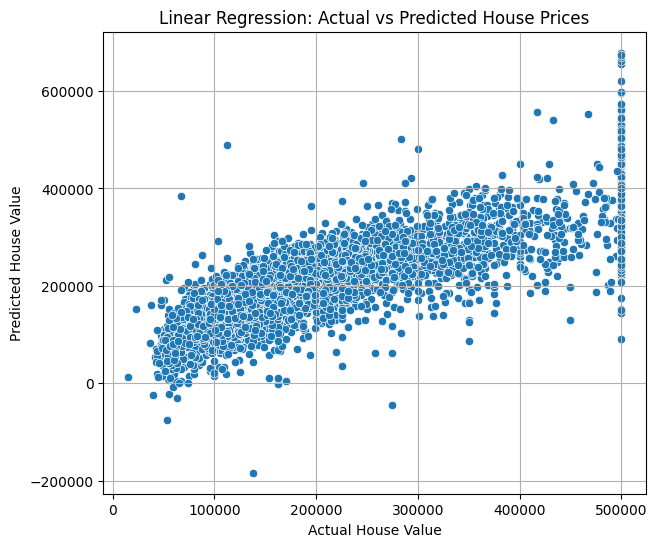

In [56]:
plt.figure(figsize=(7,6))
sns.scatterplot(x=y_test, y=y_pred_lin)
plt.xlabel("Actual House Value")
plt.ylabel("Predicted House Value")
plt.title("Linear Regression: Actual vs Predicted House Prices")
plt.grid(True)
plt.show()

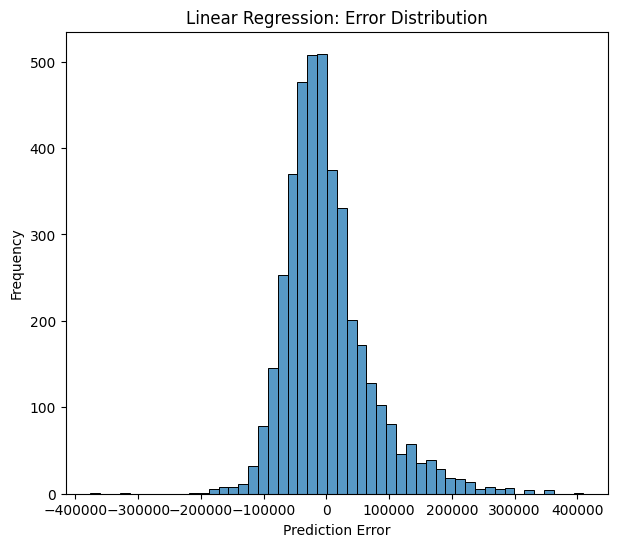

In [57]:
# error distribution
errors_lin = y_test - y_pred_lin
plt.figure(figsize=(7,6))
sns.histplot(errors_lin, bins=50)
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Linear Regression: Error Distribution")
plt.show()